In [32]:
import pandas as pd
import random
from datetime import datetime
import numpy as np

## Глава 1. Структуры данных в Pandas: Series и DataFrame

### 1.1 Структура данных Series

In [ ]:
#Конструктор класса Series выглядит следующим образом:
pd.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)

* *data: массив, скалярное значение, dict; значение по умолчанию:
None
* Структура, на базе которой будет построен Series.
* index: одномерный массив; значение по умолчанию: None
* Список меток, который будет использоваться для доступа к
элементам Series. Длина списка должна быть равна длине data.
* dtype: numpy.dtype; значение по умолчанию: None
* Объект, определяющий тип данных.
* copy: bool; значение по умолчанию: False
* Если параметр равен True, то будет создана копия массива данных.

In [ ]:
# Создание Series из списка Python
s1 = pd.Series([1, 2, 3, 4, 5])

# второй списо будет индексами
s2 = pd.Series([1, 2, 3, 4, 5], ['a', 'b', 'c', 'd', 'e'])

# Создание Series из ndarray массива из numpy
ndarr = np.array([1, 2, 3, 4, 5])
s3 = pd.Series(ndarr, ['a', 'b', 'c', 'd', 'e'])

# Создание Series из словаря (dict)
d = {'a':1, 'b':2, 'c':3}
s4 = pd.Series(d)

# Создание Series с использованием константы
a = 7
s5 = pd.Series(a, ['a', 'b', 'c'])

Работа с элементами Series

In [ ]:
# по численному индексу
s6[2]

# использовать метку
s6['d']

# со срезами
s6[:2]

# условное выражение
s6[s6 <= 3]

# работать как с векторами: складывать, умножать вектор на число и т.п
s6 + s7

# При умножении структуры на число, все элементы структуры умножаются на данный множитель
s6 * 3

### 1.2 Структура данных DataFrame

In [ ]:
# Конструктор класса DataFrame выглядит так:
DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)

Параметры конструктора:
* data: ndarray, dict или DataFrame; значение по умолчанию: None
* Данные, на базе которых будет создан DataFrame.
* index: одномерный массив; значение по умолчанию: None
* Список меток для записей (имена строк таблицы).
* columns: одномерный массив; значение по умолчанию: None
* Список меток для полей (имена столбцов таблицы).
* dtype: numpy.dtype; значение по умолчанию: None
* Объект, определяющий тип данных.
* copy: bool; значение по умолчанию: False
* Если параметр равен True, то будет создана копия массива
данных.

In [3]:
# Создание DataFrame из словаря
d = {'price':pd.Series([1, 2, 3], index=['v1', 'v2', 'v3']),'count':
pd.Series([10, 12, 7], index=['v1', 'v2', 'v3'])}

df1 = pd.DataFrame(d)

# Индексы созданного DataFrame
df1.index

# Столбцы созданного DataFrame:
df1.columns



# Создание DataFrame из списка словарей
d3 = [{'price': 3, 'count':8}, {'price': 4, 'count': 11}]
df3 = pd.DataFrame(d3)

# получения сводной информации
df3.info()


# Создание DataFrame из двумерного массива
nda1 = np.array([[1, 2, 3], [10, 20, 30]])
df4 = pd.DataFrame(nda1)


# создание из списков со списками
data = [
    [1, 'apple', 10.5],
    [2, 'banana', 20.3],
    [3, 'cherry', 15.8]
]

df = pd.DataFrame(data, columns=['ID', 'Fruit', 'Price'])

Работа с элементами DataFrame

In [ ]:
# Выбор столбца 
df[col] #Series

#Выбор строки по метке 
df.loc[label] #Series

#Выбор строки по индексу 
df.iloc[loc] #Series

#Срез по строкам 
df[0:4] #DataFrame

#Выбор строк, отвечающих условию
df[bool_vec] #DataFrame

## Глава 2. Доступ к данным в структурах pandas

In [ ]:
#Выбор строки по метке 
df.loc[label] #Series

#Выбор строки по индексу 
df.iloc['числа или срез'] #Series


### 2.2 Доступ к данным структуры Series

In [ ]:
# Обращение по отдельной метке.
s['a']

# Обращение по массиву меток.
s[['a', 'c', 'e']]

# Обращение по срезу меток.
s['a':'c']

In [ ]:
# Обращение по отдельному индексу.
s[1]

# Обращение с использованием списка индексов.
s[[1, 2 ,3]]

# Обращение по срезу индексов.
s[:3]

In [ ]:
# Элементы, значение которых больше либо равно 30:
s[lambda x: x>= 30]

s[s > 30]



### 2.3 Доступ к данным структуры DataFrame

In [ ]:
# Обращение к конкретному столбцу.
df['count']

# Обращение с использованием массива столбцов.
df[['count','price']]

# Обращение по срезу меток.
df['a':'b']

In [ ]:
# Получим все элементы, у которых значение в столбце 'count' больше 15:

df[lambda x: x['count'] > 15]

df[df['count'] > 15]

### 2.4 Использование атрибутов для доступа к данным

In [ ]:
# доступа к элементу через атрибут
s.a

df.price


### 2.5 Получение случайного набора из структур pandas

In [ ]:
# Для выбора случайного элемента из Series
s.sample()
s.sample(n=3)

# возможность указать долю от общего числа объектов
s.sample(frac=0.3)

# Через вектор весов. Вес, в данном случае, это вероятность появления элемента в выборке
w = [0.1, 0.2, 0.5, 0.1, 0.1]
s.sample(n = 3, weights=w)

In [ ]:
# случайный доступ структуры DataFrame
df.sample()

# можно указать ось
df.sample(axis=1)

# Выбор двух столбцов случайным образом:
df.sample(n=2, axis=1)

# Выбор двух строк случайным образом:
df.sample(n=2)


### 2.6 Индексация с использованием логических выражений

In [ ]:
# При работе с Series возможны следующие варианты использования
s[s>30]
s[s==10]
s[(s>=30) & (s<50)] #в интервале [30, 50)

In [ ]:
# При работе с DataFrame необходимо указывать столбец, по-которому будет производиться фильтрация (выборка):

df[df['price'] > 3]

fn = df['cat'].map(lambda x: x == 'A')
df[fn]

### 2.7 Использование isin при работы с данными в pandas

In [ ]:
# 
s.isin([10, 20])

df.isin([1, 3, 25, 30, 10])

df_1['col_1'] = df_1['col_1'].isin(df_2['col_3']).astype(int) #вернет 0 и 1 в зависимости от вхождения

## Глава 3. Типы данных в pandas

Типы данных в pandas
|**Тип данных**|**Описание**|
|-|-|
|int64|64 разрядное целочисленное значение, не зависит от платформы|
|float64|64 разрядное число с плавающей точкой, не зависит от платформы|
|object|Текст или любое другое значение|
|bool|Булевое значение: True / False|
|category|Конечное множество текстовых элементов|
|datetime64[ns]|Дата / Время|
|timedelta64[ns]|Разница между двумя datetime элементами|


Типы расширений pandas
|**Тип данных**|**Описание**|
|-|-|
|DatetimeTZDtype|datetime c поддержкой часового пояса|
|CategoricalDtype|Тип для категориальных данных (конечное множество текстовых элементов)|
|PeriodDtype|Тип для работы с периодическими данными|
|SparseDtype|Тип для работы с разреженными данными|
|IntervalDtype|Тип для работы с интервальными данными|

In [ ]:
# данные к типу float64
s.astype('float64')

# узнать типы
df.dtypes

# Приведем тип поля 'count' к int32:
df['count'] = df['count'].astype('int32')
df = df.astype({'count':'int64'})

df['Давление'].apply(function).astype('int64')


pd.to_numeric(df['col']) #- преобразует данные в числовой тип;
pd.to_datetime(df['col'], errors='coerce') #- преобразует данные в тип datetime;
pd.to_timedelta() #- преобразует данные в тип timedelta.

In [ ]:
# Выборка данных по типу 
df.select_dtypes(include=['float64', 'int64']) # include - буждет

df.select_dtypes(exclude='datetime64[ns]') # exclude - не буждет


Категориальные типы

In [ ]:
s = pd.Series(['r', 'r', 'g', 'b'], dtype='category')

# Создадим категорию:
colors = pd.Categorical(['r', 'g', 'g', 'b', 'r'])


# Если в наборе данных будут присутствовать элементы, которые не входят в категорию, им будут присвоены значения NaN
colors = pd.Categorical(['r', 'g', 'g', 'b', 'r', 'y', 'o'],
categories=['r', 'g', 'b'])


df = pd.DataFrame({'C1':list('rrg'), 'C2':list('rgb')}, dtype='category')

# Порядковые категории (может быть роль в фильме, образование и т.п.)
level = pd.Categorical(['h', 'h', 'm', 'l'], categories=['l', 'm', 'h'], ordered=True)
print('min: {}, max: {}'.format(level.min(), level.max()))

## Глава 4. Работа с пропусками в данных

### 4.1 Pandas и отсутствующие данные (пропуски)

In [ ]:
# мы получаем таблицу того же размера, но на месте реальных данных, в ней находятся элементы типа bool, которые равны False, если значение поля не-NaN, либо True
pd.isnull(df) 

df.isna(df) # по сути алиас для isnull()

In [ ]:
# Можно воспользоваться следующим подходом для определения количества NaN элементов в записях:
df.isnull().sum() # вернет по каждой строке
df.isnull().sum().sum() # вернет всего

taxi_data.isna().any(axis=1).sum() #any - если хотябы в 1 строке

# Рассчитываем процент пропусков по каждому столбцу
missing_percent = df.isnull().mean() * 100

### 4.2 Замена отсутствующих данных

In [ ]:

df.fillna(0) #заполнить нулями
df.fillna(df.mean()) #заполнить средним

Этот метод не изменяет текущую структуру, он возвращает структуру
DataFrame, созданную на базе существующей, с заменой NaN значений
на те, что переданы в метод в качестве аргумента

### 4.3 Удаление объектов/столбцов с отсутствующими
данными

In [ ]:
df.dropna() # удалить все объекты, которые содержат значения NaN
df.dropna(axis=1) #удалит столбцы
df.dropna(axis = 1, thresh=3) # удалены все столбцы в которых количество не-NaN элементов меньше трех

## Глава 5. Работа со структурами данных в pandas: удаление, объединение, расширение, группировка

### 5.1 Добавление элементов в структуру pandas

In [ ]:
# Добавим в структуру s новый элемент с индексом 'F' и значением 6:
s['F']=6

# новый столбец 'type',
df['type']=['circle', 'square', 'triangle']
#Можно добавить столбец с константным значением:
df['value'] = 7

# добавить объект Series как строку
new_row = pd.Series(['yellow', 34, 10, 'rectangle', 7], ['color',
'speed', 'volume', 'type', 'value'])
df.append(new_row, ignore_index=True)

### 5.2 Удаление элементов из структуры в pandas

In [ ]:
s_new = s.drop(['A', 'B']) # После операции drop(), структура s осталась прежней
s.drop(['A', 'B'], inplace=True)

# удаление строк
df_new = df.drop([0]) # После операции drop(), структура df осталась прежней
df.drop([0], inplace=True) 

# удаление столбца
df.drop(['color', 'value'], axis=1, inplace=True)

### 5.3 Объединение данных

In [ ]:
#Задачу объединения структур в pandas решает метод concat:
pd.concat(list_df, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)

df1 = pd.concat([dfr1, dfr2, ....])

Рассмотрим наиболее важные аргументы:
* objs: массив или словарь структур Series, DataFrame или Panel.
* Структуры для объединения.
* axis: 0 - строки, 1 - столбцы; значение по умолчанию: 0 Ось, вдоль которой будет производиться объединение.
* join: {'inner', 'outer'}; значение по умолчанию: 'outer'
* Тип операции объединения, 'outer' - итоговая структура будет
результатом объединения (логическое ИЛИ) переданных
60
структур, 'inner' - итоговая структура будет результатом
пересечения (логическое И) переданных структур.
* ignore_index: bool; значение по умолчанию: False
* True — не используется значение индекса в процессе
объединения, False – используется.

In [ ]:
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=True, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

In [ ]:
dfm2 = pd.merge(dfr1, dfr3, how='left', on='colum_b')


* 'left' - это аналог SQL операции 'LEFT OUTER JOIN' при
этом будут использоваться ключи только из левого
DataFrame.
* 'right' - аналог SQL операции 'RIGHT OUTER JOIN' -
используются ключи из правого DataFrame.
* 'outer' - аналог SQL операции 'FULL OUTER JOIN' -
используется объединение ключей из правого и левого
DataFrame.
* 'inner' - аналог SQL операции 'INNER JOIN' -
используется пересечение ключей из правого и левого
DataFrame.
* on: список
* Список имен столбцов для объединения, столбцы должны
входить как в левый, так и в правый DataFrame.
* left_on: список
* Список столбцов левого DataFrame, которые будут
использоваться как ключи.
* right_on: список
* Список столбцов из правого DataFrame, которые будут
использоваться как ключи.
* left_index: bool; значение по умолчанию: False
* Если параметр равен True, то будет использован индекс (метки
строк) из левого DataFrame в качестве ключа(ей) для
объединения.
* right_index: bool; значение по умолчанию: False
* Если параметр равен True, то будет использован индекс (метки
строк) из правого DataFrame в качестве ключа(ей) для
объединения.
65
* sort: bool; значение по умолчанию: False
* Если параметр равен True, то данные в полученном DataFrame
будут отсортированы в лексикографическом порядке.

## Глава 6. Работа с внешними источниками данных

### 6.1 Работа с данными в формате CSV

In [ ]:
# создадим строку, содержащую данные в формате CSV
csv_d1 = 'col_A, col_B, col_C\na1, b1, c1\na2, b2, c2'
df = pd.read_csv(StringIO(csv_d1))


In [ ]:
# в первой строке набора данных содержатся заголовки колонок таблицы
df = pd.read_csv('file.csv')

# задать названия
df1 = pd.read_csv('file.csv', header=None, names=['type_a', 'type_b', 'type_c'])


df_chunks = pd.read_csv('c:/test.csv', chunksize=2) # количество строк которые нужно считать  в рамках одной порции

# Такой подход позволяет работать с DataFrame'ами как с итераторами
df_chunks = pd.read_csv('c:/test.csv', chunksize=2)
print(df_chunks.get_chunk())
#Name Age City
#0 Anna 29 Moscow
#1 John 21 New-York
print(df_chunks.get_chunk())
#Name Age City
#2 Ivan 18 Tomsk
#3 Mike 32 Los-Angeles



In [ ]:
# запишем содержимое структуры df в файл с именем tmp.csv:
df.to_csv('tmp.csv')

### 6.2 Работа с данными в формате JSON

In [ ]:
df1=pd.read_json(json_buf, orient='split') #orient='record' Ориентация c
df3 = pd.read_json(json_buf3, orient='index') 

json_split = df.to_json(orient='split')


### 6.3 Работа с Excel файлами

#### 6.3.1 Чтение данных

Для чтения данных используется метод read_excel(). Он может
работать как с файлами в формате Excel 2003 (расширение .xls), так и с
файлами в формате Excel 2007 (расширение .xlsx). Для экспериментов
создадим Excel-файл в формате Excel 2003 с именем “test.xls”, добавим
в него два листа “Sheet1”, “Sheet2”

In [ ]:
# Прочитаем лист “Sheet1” и поместим полученные данные в DataFrame:
df_xls_sheet1 = pd.read_excel('c:\\test.xls', sheetname='Sheet1', header=None)

In [ ]:
# В самом простом случае, работа с ExcelFile может выглядеть вот так:
excel = pd.ExcelFile('c:\\test.xls')
df2 = pd.read_excel(excel, sheetname='Sheet2', header=None)

In [ ]:


with pd.ExcelFile('c:\\test.xls') as excel:
    df1 = pd.read_excel(excel, sheetname='Sheet1', header=None)
    print(df1)  

In [ ]:
# Запись осуществляется с помощью метода to_excel():

df.to_excel('test_excel.xlsx', sheet_name='Sheet1')

# параметру header присвоить значение None, то в таблице будет отсутствовать заголовки колонок
# чтобы убрать индексы (имена) строк нужно дополнительно добавить параметр index=False
df.to_excel('test_excel2.xlsx', sheet_name='Sheet1', header=None, index=False)

## Глава 7. Операции над данными

### 7.1 Арифметические операции

In [ ]:
df1.add(df2) # сложения структур используется метод add() :
df1.add(5) # К элементам структуры можно добавить константу:

# Вычитание осуществляется с помощью метода sub() :
df1.sub(df2)
df1.sub(7)

# Для умножения структур применяется метод mul() :
df1.mul(df2)
df1.mul(2)

# Для деления используется метод div() :
df1.div(df2)
df1.div(2)

### 7.2 Логические операции

In [ ]:
# Определим элементы структуры df2, значения которые больше 20:
df2 > 20

df.any() # логическое ИЛИ
all() #логическое И
# Свертка по столб
(df2 > 20).any()
(df2 > 20).all()
#Свертка по строкам:
(df2 > 20).any(axis=1)
(df2 > 20).all(axis=1)

# сравнения элементов структур на равенство или оператор проверки на равенства (==)
df2.equals(df3) # результат будет True, в противном случае False:
df2 == df3 #получим DataFrame, элементами которого будут логические переменные


### 7.3 Статистики

In [ ]:
# все параметры можно применять по:
axis=0 # по столбцам
axis=1 # по строкам

df.count() # Количество не-NA объектов
df.sum() # Сумма
df.mean() # Среднее значение
df.mad() # Среднее абсолютное отклонение
df.median() # Медиана
df.min() # Минимум
df.max() # Максимум
df.mode() # Мода
df.abs() # Абсолютное значение
df.prod() # Произведение
df.std() # Стандартное отклонение
df.var() # Несмещенная дисперсия
df.sem() # Стандартная ошибка среднего
df.skew() # Скошенность (момент 3-го порядка)
df.kurt() # Эксцесс (момент 4-го порядка)
df.quantile() # Квантиль (%)
df.cumsum() # Кумулятивная сумма
df.cumprod() # Кумулятивное произведение
df.cummax() # Кумулятивный максимум

In [ ]:
# получения сводной информации по статистикам
df.describe()

s.value_counts() # получения информации о количестве конкретных чисел


### 7.4 Функциональное расширение

In [ ]:
# Создадим три функции: возведение в квадрат, корень третьей степени и функция, вычитающая число 10:
sqr = lambda x: x**2
root3 = lambda x: x**(1.0/3.0)
minus10 = lambda x: x - 10

root3(minus10(sqr(df))) #сначала возвести каждый элемент структуры df в
#квадрат, потом вычесть из полученного значения 10, а следом взять
#корень третьей степени

# или 
(df.pipe(sqr).pipe(minus10).pipe(root3))

In [ ]:
# применение своей функции по строкам/столбцам
df.apply(lambda x: sum(x)**(0.5)) # по столбцам
df.apply(lambda x: sum(x)**(0.5), axis=1) # построчно

In [ ]:
# найдем сумму элементов по столбцам
df.agg('sum')

#посчитать сумму, среднее значение и стандартное отклонение
df.agg(['sum', 'mean', 'std'])

# Не забудем и про свои собственные функции:
strange = lambda x: sum(x)**(0.5)
min_div_5 = lambda x: min(x) / 5.0
df.agg([max, strange, min_div_5])


strange = lambda x: sum(x)**(0.5)
min_div_5 = lambda x: min(x) / 5.0
strange.__name__ = 'strange fun'
min_div_5.__name__ = 'min / 5'
df.agg([max, strange, min_div_5])

## max          65.000000   54.000000   25.000000   83.000000
## strange fun  9.643651    10.630146   7.141428    13.114877
## min / 5      2.400000    4.800000    2.400000    3.400000


# трансформация - это применение функции к каждому элементу структуры

mul2 = lambda x: x * 2
mul2.__name__ = 'mul2'
div2 = lambda x: x / 2
div2.__name__ = 'div2'

df.transform([mul2])

#   mul2 mul2 mul2 mul2
# 0 24 48 28 34
# 1 32 108 50 166
# 2 130 70 24 144

df.transform([mul2, div2])

#   mul2 div2 mul2 div2 mul2 div2 mul2 div2
# 0 24 6.0 48 12.0 28 7.0 34 8.5
# 1 32 8.0 108 27.0 50 12.5 166 41.5
# 2 130 32.5 70 17.5 24 6.0 144 36.0

df[0].transform([mul2, div2]) # Можно работать с отдельными столбцами

### 7.5 Использование методов типа str для работы с текстовыми данными

In [3]:
s = pd.Series([' hellO', ' abcABC ', ' one', 'TWO ', ' tHRee'])

print(s.str.lower()) # Через атрибут str мы можем получить доступ ко всем методам типа данных str

print(s.str.lower().str.strip().str.title()) # Удалим все лишние пробелы и сделаем заглавными первые буквы слов

0       hello
1     abcabc 
2         one
3        two 
4       three
dtype: object
0     Hello
1    Abcabc
2       One
3       Two
4     Three
dtype: object


## Глава 8. Настройка pandas

### 8.1 API для работы с настройками pandas

**Функции для работы с настройками pandas**

|**Функция**|**Описание**|
|-|-|
|get_option()|Получение значения параметра|
|set_option()|Установка нового значения параметра|
|reset_option()|Сброс параметра на значение “по умолчанию”|
|describe_option()|Вывод текстового описания параметра|
|option_context()|Присвоение параметрам новых значений в рамках определенного блока кода. Используется с оператором with|

In [ ]:
# Максимальное количество выводимых строк:
pd.get_option('display.max_rows')
# Используемая кодировка
pd.get_option('display.encoding')
# Максимальное количество выводимых столбцов с данными:
pd.get_option('display.max_columns')

# Изменим это значение на 5
pd.set_option('display.max_rows', 5)

# Установим прежнее значение
pd.set_option('display.max_rows', 60)

# Сбрасим display.max_rows на значение “по умолчанию”
pd.reset_option('display.max_rows')

# Описание параметра
pd.describe_option('display.max_rows')

In [ ]:
# Если необходимо выполнить блок кода временно присвоить ряду настроенных параметров

with pd.option_context('display.max_rows', 25):
    print(pd.get_option('display.max_rows'))
# 25
pd.get_option('display.max_rows')
# 60



In [ ]:
# Настраиваемые параметры pandas
# |Настройка|Значение по умолчанию|Описание|

display.chop_threshold # None
# Если float-значение ниже этого порога, то оно будет отображаться равным 0

display.colheader_justify # right
# Выравнивание заголовков столбцов. Используется DataFrameFormatter’ом.

display.date_dayfirst # False
# Если параметр равен True, то при отображении и парсинге дат будет использоваться следующий порядок: день/месяц/год.

display.date_yearfirst # False
# Если параметр равен True, то при отображении и парсинге дат будет использоваться следующий порядок: год/месяц/день.

display.encoding # UTF-8
# Определяет кодировку для строк, возвращаемых через метод to_string, а также для отображения строк в консоли.

display.max_columns # 20
# если все столбцы не поместились вертикально Значение None определяет неограниченное количество символов.

display.max_colwidth # 50
# Максимальная ширина столбца (в символах)

display.max_rows # 60
# максимальное количество строк, None - Для снятия ограничения

display.memory_usage # True
# Указывает, должен ли отображаться объем занимаемой памяти для DataFrame при вызове метода df.info().

display.notebook_repr_html # True
#Если параметр равен True, то IPython notebook будет использовать html-представление для объектов pandas.

display.precision # 6
#количество знаков после запятой при выводе чисел с плавающей точкой.

display.width #80
# Ширина дисплея в символах, None автоматически определит ширину

display.html.border # 1
# Определяет значение для атрибута border=value, который  будет вставлен в тег <table> для HTML-представления структуры DataFrame.

io.excel.xls.writer # xlwt
# движок для работы с Excel в формате “xls”.

io.excel.xlsm.writer # openpyxl
# движок для работы с Excel в формате xlsm.

io.excel.xlsx.writer # openpyxl
# движок для работы с Excel в формате xlsx.

mode.sim_interactive # False
# Моделирование интерактивного режима, используется при тестировании.

## Глава 9. Инструменты для работы с данными

### 9.1 Скользящее окно. Статистики

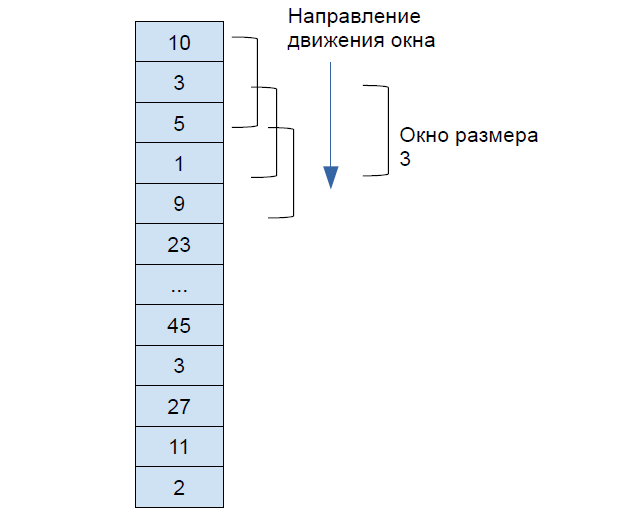

Для расчета различных статистик с заданным окном, для начала,
создадим объект класса Rolling. Для этого воспользуемся функцией

pandas.DataFrame.rolling():

DataFrame.rolling(window, min_periods=None, freq=None, center=False,
win_type=None, on=None, axis=0, closed=None)

Данная функция имеет следующие параметры:
* window: int Размер окна.
* min_periods: int; значение по умолчанию: None Минимальное количество элементов в окне для получения
значения статистики.
* freq: str или объект DateOffset; значение по умолчанию: None В настоящий момент данный параметр имеет статус Deprecated и не рекомендован к использованию.
* center: bool; значение по умолчанию: False Установка метки в центр окна.
* win_type: str; значение по умолчанию: None Тип окна
* on: str; значение по умолчанию: None Задает столбец, по которому будут производиться вычисления.
* closed: str; значение по умолчанию: None Определяет конечные точки закрытого интервала ('right', 'left', 'both', 'neither').
* axis: int или str; значение по умолчанию: 0 Ось, вдоль которой будут производиться вычисления (0 - вычисления по строкам, 1 - по столбцам).

In [5]:
arr = [random.randint(0, 50) for i in range(500)]
s = pd.Series(arr)
s.shape

(500,)

In [ ]:
# размер окна равным 10 - количество записей подряд

roll = s.rolling(window=10)
roll

Rolling [window=10,center=False,axis=0,method=single]

Методы, используемые для расчета скользящих статистик
* apply() Функция общего назначения
* corr() Корреляция
* cov() Ковариация
* count() Количество не-NA объектов
* kurt() Эксцесс (момент 4-го порядка)
* max() Максимум
* mean() Среднее значение
* median() Медиана
* min() Минимум
* quantile() Квантиль (%)
* skew() Скошенность (момент 3-го порядка)
* std() Стандартное отклонение
* sum() Сумма
*  var() Несмещенная дисперсия

In [7]:
pd.options.display.max_rows=20
roll.median()

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
495    23.5
496    29.0
497    23.5
498    23.5
499    23.5
Length: 500, dtype: float64

In [11]:
roll.max()

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
495    41.0
496    41.0
497    41.0
498    41.0
499    41.0
Length: 500, dtype: float64

In [ ]:
# Параметры, определяющие тип окна для расчета статистик
'boxcar' #Прямоугольное окно (окно Дирихле)
'triang' #Треугольное окно
'blackman' #Окно Блэкмана
'hamming' #Окно Хемминга
'bartlett' #Окно Барлетта
'parzen' #Окно Парзена
'bohman'# Окно Бохмана
'blackmanharris' #Окно Блэкмана-Харриса
'nuttall' #Окно Наттела
'barthann' #Окно Барлетта-Ханна
'kaiser' #Окно Кайзера
'gaussian' #Окно Гаусса
'general_gaussian' #Обобщенное Гауссовое окно
'slepian' #Окно Слепиана

### 9.2 Расширяющееся окно. Статистики

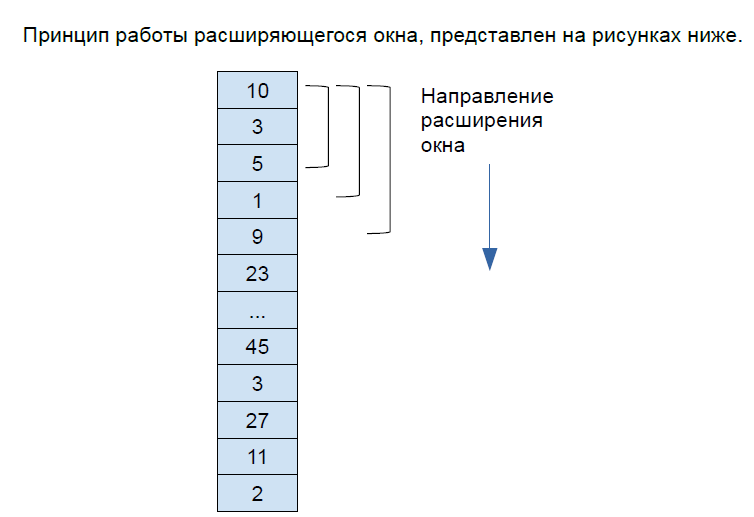

Для работы с расширяющимся окном используется объект класса
Expanding, который можно получить через метод expanding() структуры
pandas.

In [ ]:
# Создадим объект Expanding:
ex = s.expanding()
ex
#Expanding [min_periods=1,center=False,axis=0]

#Вычислим среднее значение для расширяющегося окна:
ex.mean()

#Вычисление стандартного отклонения для расширяющегося окна:
ex.std()

### 9.3 Время-ориентированное скольжение

Суть время-ориентированного скольжения в том, что в качестве окна
используется временной интервал.

In [ ]:
#Создадим объект Rolling с окном в 2 секунды:
rt = df.rolling('2s')
rt.sum()

### 9.4 Агрегация данных

Функция агрегации позволяет одновременно производить расчет
различных статистик для заданного набора данных.

In [ ]:
#Создадим объект скольжение:
rt = df.rolling(window='5s')
rt
#Rolling
#[window=5000000000,min_periods=1,center=False,win_type=freq,axis=0]

# посчитаем одновременно сумму, среднее значение и стандартное отклонение. 
import numpy as np
rt.agg([np.sum, np.mean, np.std])

## Глава 10. Временные ряды

Для работы с временными рядами в pandas используются классы,
представленные в таблице


|Класс|Создание|Описание|
|--|--|--|
|Timestamp|to_datetime, Timestamp| Единичная временная метка|
|DatetimeIndex|to_datetime, date_range, bdate_range, DatetimeIndex| Набор объектов Timestamp|
|Period|Period|Единичный временной интервал|
|PeriodIndex|period_range, PeriodIndex|Набор объектов Period|

В pandas различают временные метки и временные интервалы.

Временная метка - это конкретное значение даты/времени, например:
2018-01-01 01:20:35. 

Временной интервал предполагает наличие
неполной временной метки и маркера, который определяет период,
например метка 2018-01 будет иметь маркер 'M', что означает - месяц.


DatetimeIndex - это класс, позволяющий хранить массив временных
меток, которые могут быть использованы в качестве индексов при
124
построение структур данных pandas. 

PeriodIndex - класс, хранящий
массив временных интервалов, который также может быть использован
в качестве индекса.

### 10.1 Работа с временными метками

Начнем со знакомства с конструктором Timestamp:
pandas.Timestamp(ts_input, freq, tz, unit, offset)
Ниже представлено описание аргументов.
- ts_input: datetime, str, int, float
  - Значение, которое будет преобразовано в объект класса Timestamp.
- freq: str, DateOffset
  - Величина сдвига.
- tz: str, pytz.timezone, dateutil.tz.tzfile или None; значение по умолчанию: None
  - Временная зона.
- unit: str; значение по умолчанию: None
  - Единица измерения, параметр используется если значение ts_input имеет тип int или float.
- offset: str, DateOffset: значение по умолчанию: None
  - Не поддерживается, используйте freq.

In [ ]:
#Создание объекта из строки:
ts = pd.Timestamp('2018-10-5')
ts
#Timestamp('2018-10-05 00:00:00')

ts = pd.Timestamp('2018-10-5 01:15:33')
ts
#Timestamp('2018-10-05 01:15:33')

In [ ]:
# Использование объекта datetime :
from datetime import datetime
dt = datetime.now()
dt
#datetime.datetime(2019, 12, 2, 21, 33, 48, 621911)

#ts = pd.Timestamp(dt)
ts
#Timestamp('2019-12-02 21:33:48.621911')

In [ ]:
# Использование int и float значений :
ts = pd.Timestamp(1517246359, unit='s')
ts
#Timestamp('2018-01-29 17:19:19')

ts = pd.Timestamp(1517246359.732405, unit='s')
ts
#Timestamp('2018-01-29 17:19:19.732404947')

In [ ]:
ts = pd.to_datetime('2018-01-01 00:01:02')
ts
#Timestamp('2018-01-01 00:01:02')

ts = pd.to_datetime('20180101023215', format='%Y%m%d%H%M%S')
ts
#Timestamp('2018-01-01 02:32:15')

ts = pd.to_datetime(1517246359, unit='s')
ts
#Timestamp('2018-01-29 17:19:19')

In [ ]:
# диапазон
pd.Timestamp.min
#Timestamp('1677-09-21 00:12:43.145225')
pd.Timestamp.max
#Timestamp('2262-04-11 23:47:16.854775807')

Создание ряда временных меток

Ряд временных меток - это объект класса DatetimeIndex, который может
выступать в качестве индекса при создании структур Series и DataFrame.
Объект такого класса можно создать с помощью метода to_datetime(), либо date_range().

In [ ]:
dti = pd.to_datetime(['2018-01-01', '2018-01-02'])
dti
#DatetimeIndex(['2018-01-01', '2018-01-02'], dtype='datetime64[ns]',freq=None)

dti = pd.to_datetime([pd.Timestamp('2018-01-01'), pd.Timestamp('2018-01-02')])
dti = pd.to_datetime([1517246359, 1517246360, 1517246361], unit='s')

Для создания временного ряда из заданного диапазона применяется
метод date_range():
pandas.date_range(start=None, end=None, periods=None, freq='D', tz=None,
normalize=False, name=None, closed=None, **kwargs)

Среди аргументов данного метода выделим следующие:
- start: str; значение по умолчанию: None
  - Левая граница генерируемых данных.
- end: str; значение по умолчанию: None
  - Правая граница генерируемых данных.
- period: integer; значение по умолчанию: None
  - Количество элементов в создаваемом массиве.
- freq: str(или DateOffset); значение по умолчанию: 'D'
  - Шаг, с которым будут генерироваться данные.
- tz: str; значение по умолчанию: None
  - Временная зона, например: “Europe/Brussels”.

Метод date_range() возвращает объект класса DatetimeIndex, который
можно использовать в качестве индекса при построении структур данных
pandas.

Значение параметра freq Описание
- D День
- W Неделя
- M Месяц
- SM Половина месяца (15 дней)
- Q Квартал
- A, Y Год
- H Час
- T, min Минута
- S Секунда
- L, ms Миллисекунда
- U, us Микросекунда
- N Наносекунда

In [5]:
dt_h = pd.date_range(start='2017-02-01', freq='h', periods=120)
dt_h[:30]

DatetimeIndex(['2017-02-01 00:00:00', '2017-02-01 01:00:00',
               '2017-02-01 02:00:00', '2017-02-01 03:00:00',
               '2017-02-01 04:00:00', '2017-02-01 05:00:00',
               '2017-02-01 06:00:00', '2017-02-01 07:00:00',
               '2017-02-01 08:00:00', '2017-02-01 09:00:00',
               '2017-02-01 10:00:00', '2017-02-01 11:00:00',
               '2017-02-01 12:00:00', '2017-02-01 13:00:00',
               '2017-02-01 14:00:00', '2017-02-01 15:00:00',
               '2017-02-01 16:00:00', '2017-02-01 17:00:00',
               '2017-02-01 18:00:00', '2017-02-01 19:00:00',
               '2017-02-01 20:00:00', '2017-02-01 21:00:00',
               '2017-02-01 22:00:00', '2017-02-01 23:00:00',
               '2017-02-02 00:00:00', '2017-02-02 01:00:00',
               '2017-02-02 02:00:00', '2017-02-02 03:00:00',
               '2017-02-02 04:00:00', '2017-02-02 05:00:00'],
              dtype='datetime64[ns]', freq='h')

In [6]:
#создать DatetimeIndex, содержащий временные метки с шагом в одну минуту и 
# общим интервалом в один час

dt_m = pd.date_range(start='2017-02-01', freq='min', periods=60)
dt_m[:30]

DatetimeIndex(['2017-02-01 00:00:00', '2017-02-01 00:01:00',
               '2017-02-01 00:02:00', '2017-02-01 00:03:00',
               '2017-02-01 00:04:00', '2017-02-01 00:05:00',
               '2017-02-01 00:06:00', '2017-02-01 00:07:00',
               '2017-02-01 00:08:00', '2017-02-01 00:09:00',
               '2017-02-01 00:10:00', '2017-02-01 00:11:00',
               '2017-02-01 00:12:00', '2017-02-01 00:13:00',
               '2017-02-01 00:14:00', '2017-02-01 00:15:00',
               '2017-02-01 00:16:00', '2017-02-01 00:17:00',
               '2017-02-01 00:18:00', '2017-02-01 00:19:00',
               '2017-02-01 00:20:00', '2017-02-01 00:21:00',
               '2017-02-01 00:22:00', '2017-02-01 00:23:00',
               '2017-02-01 00:24:00', '2017-02-01 00:25:00',
               '2017-02-01 00:26:00', '2017-02-01 00:27:00',
               '2017-02-01 00:28:00', '2017-02-01 00:29:00'],
              dtype='datetime64[ns]', freq='min')

In [7]:
#создание структуры Series

rnd = [random.randint(-5, 5) for i in range(len(dt_h))]
s_dt = pd.Series(rnd, index=dt_h)

### 10.2 Работа с временными интервалами

pd.Period основными параметрами являются value и freq:
- value: str; значение по умолчанию: None
  - Временной период.
- freq: str; значение по умолчанию: None
  - Строка с меткой, определяющей временной интервал.

In [8]:
pd.Period('2018') #год
pd.Period('2018-01') #месяц
pd.Period('2018-01-01') #день


pd.Period('2018', freq='M')

Period('2018-01', 'M')

In [9]:
prd = pd.Period('2018', freq='D')
prd

Period('2018-01-01', 'D')

In [10]:
prd + 53

Period('2018-02-23', 'D')

In [11]:
# если мы создадим объект, в котором интервалом будет месяц

prd_m = pd.Period('2018', freq='M')
print(prd_m)
print(prd_m + 5)

2018-01
2018-06


In [13]:
# Создание ряда временных интервалов
pd.PeriodIndex(['2018', '2017', '2016'], freq='M')
pd.PeriodIndex(['2018', '2017', '2016'], freq='D')

PeriodIndex(['2018-01-01', '2017-01-01', '2016-01-01'], dtype='period[D]')

In [14]:
# создания рядов временных

pd.period_range('2018', '2019', freq='M')

# Начиная с 2018.01.01 построить десять временных интервалов с шагом в неделю
pd.period_range('2018-01-01', periods=10, freq='W')

PeriodIndex(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
             '2019-01'],
            dtype='period[M]')

### 10.3 Использование временных рядов в качестве индексов

In [16]:
#Создадим DatetimeIndex - ряд временных меток с отсечкой в один день:
dt_d = pd.date_range(start='2017-02-01', freq='D', periods=50)

# На базе полученного объекта создадим структуру Series:

dr = [random.randint(-10, 10) for i in range(len(dt_d))]
s = pd.Series(dr, index=dt_d)
s[:5]

2017-02-01    1
2017-02-02   -1
2017-02-03    6
2017-02-04   -6
2017-02-05    4
Freq: D, dtype: int64

In [17]:
# делаем срез
s['2017-02-01':'2017-02-10']

2017-02-01    1
2017-02-02   -1
2017-02-03    6
2017-02-04   -6
2017-02-05    4
2017-02-06   -2
2017-02-07    5
2017-02-08   -1
2017-02-09    7
2017-02-10    0
Freq: D, dtype: int64

In [19]:
# дополнительные возможности по выборке данных. Получим данные за февраль 2017
s['2017-02'][:5]

2017-02-01    1
2017-02-02   -1
2017-02-03    6
2017-02-04   -6
2017-02-05    4
Freq: D, dtype: int64

In [22]:
# даты допускается применять объекты datetime
s[datetime(2017,2,1):datetime(2017,2,8)]

2017-02-01    1
2017-02-02   -1
2017-02-03    6
2017-02-04   -6
2017-02-05    4
2017-02-06   -2
2017-02-07    5
2017-02-08   -1
Freq: D, dtype: int64

## Глава 11. Визуализация данных

### 11.1 Построение графиков

Основным инструментом для визуализации данных в библиотеке pandas
является метод **plot()**, который может быть вызван у объекта структуры
Series или DataFrame. Если использовать этот метод без параметров, то
будет построен линейный график.

Значение параметра kind Описание
- 'bar' или 'barh' Построение столбцовой диаграммы
- 'hist' Построение гистограмм
- 'box' Коробчатая диаграмма (ящик с усами)
- 'kde' Построение графика плотности
- 'area' Диаграмма с областями
- 'scatter' Точечный график
- 'hexbin' Визуализация данных с использованием шестиугольников
- 'pie' Круговая диаграмма

<Axes: >

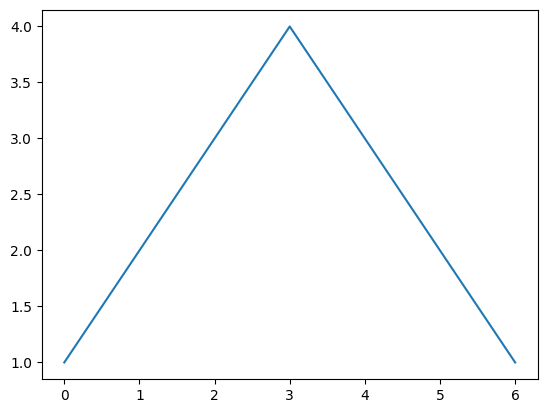

In [23]:
s = pd.Series([1, 2, 3, 4, 3, 2, 1])
s.plot()

<Axes: >

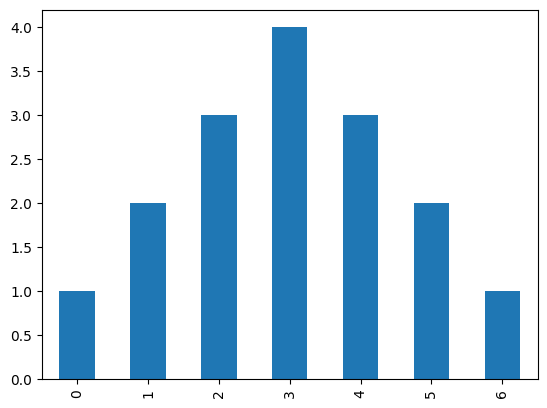

In [24]:
s.plot(kind='bar')

Pandas предоставляет еще один способ построения диаграмм. Суть его
заключается в том, что мы не используем аргумент kind метода plot(),
а вызываем специальный метод для построения нужной нам диаграммы
в формате <Структура pandas>.plot.<метод построения диаграммы>.

<Axes: >

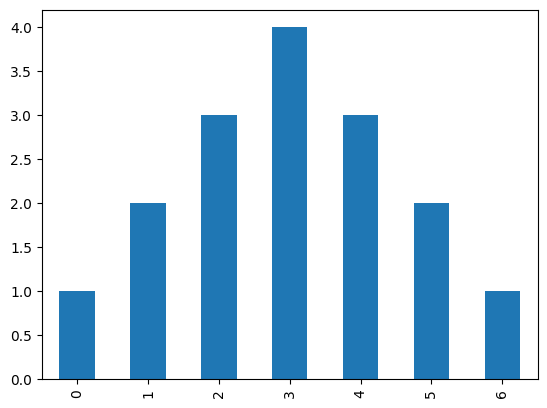

In [26]:
s.plot.bar()

#### Линейные графики

<Axes: >

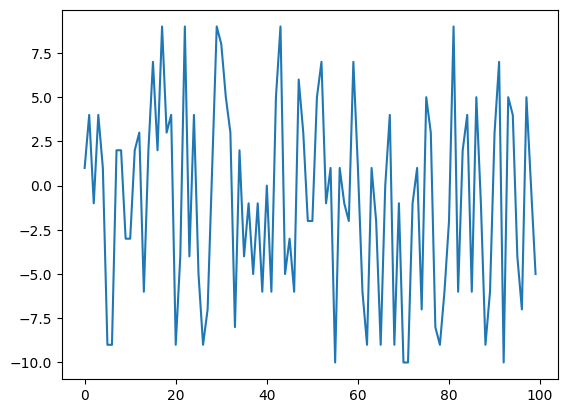

In [27]:
rnd = [random.randrange(-10, 10) for i in range(100)]
s = pd.Series(rnd)
s.plot()

Если в качестве индекса использовать DatetimeIndex, то по оси абсцисс
будут выставлены соответствующие временные метки:

<Axes: >

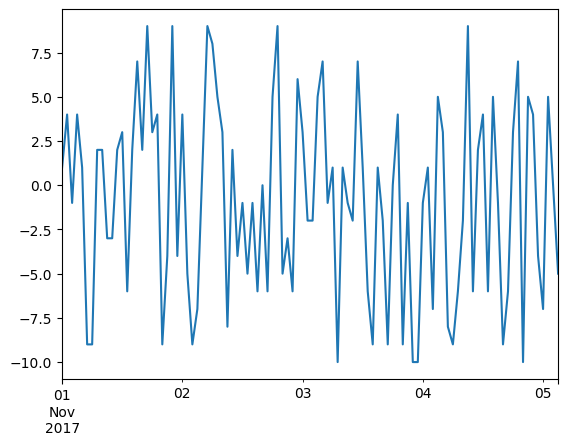

In [29]:
datetime_index= pd.date_range('2017.11.01', freq='h',
periods=len(rnd))
s_dt = pd.Series(rnd, index=datetime_index)
s_dt.plot()

Удобно строить графики для вычисляемых статистик, в качестве
примера возьмем сумму расширяющегося окна

<Axes: >

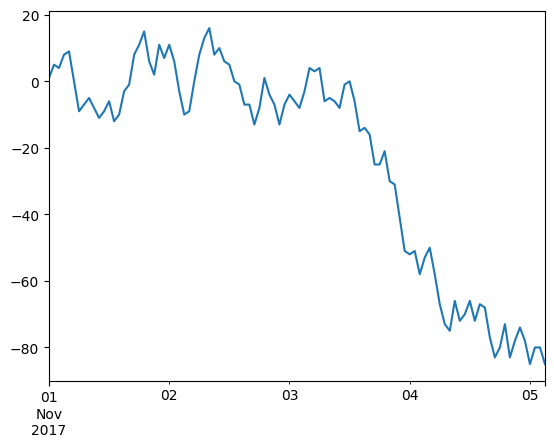

In [30]:
ex = s_dt.expanding()
ex.sum().plot()

Если вы работаете с DataFrame, то на одном поле можно отобразить
сразу несколько графиков, каждый из которых будет соответствовать
столбцу структуры

<Axes: >

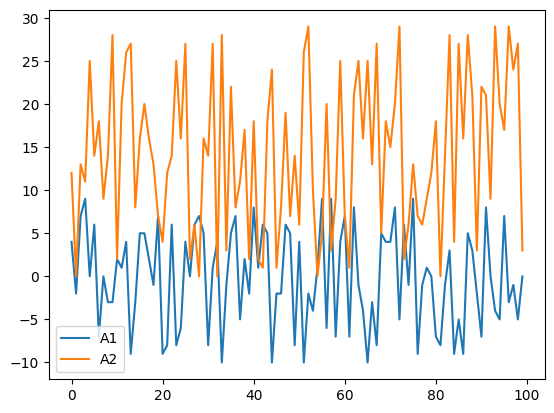

In [31]:
d_arr = [[random.randrange(-10, 10), random.randrange(0, 30)] for i in range(100)]
df = pd.DataFrame(d_arr, columns=['A1', 'A2'])
df.plot()

#### Столбчатые диаграммы

<Axes: >

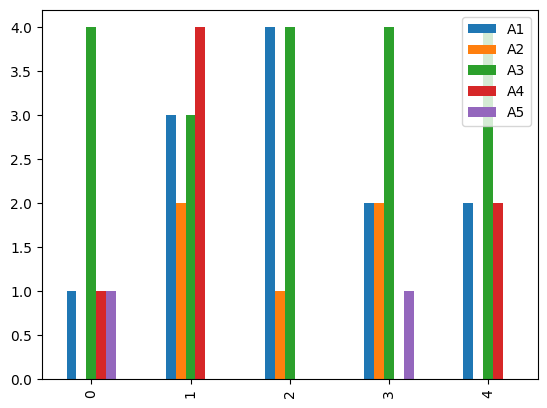

In [39]:
import numpy as np
df1 = pd.DataFrame(np.random.randint(5, size=(5,5)), columns=['A1', 'A2', 'A3', 'A4', 'A5'])
df1.plot(kind='bar')

<Axes: >

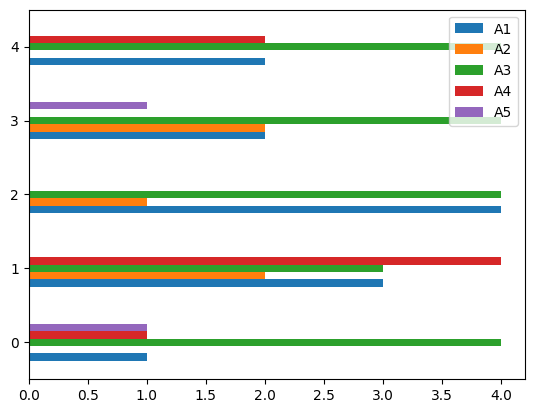

In [40]:
df1.plot(kind='barh')

<Axes: >

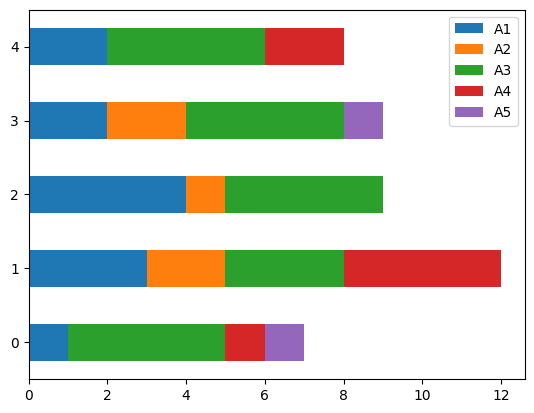

In [41]:
# стекового представления данных
df1.plot(kind='barh', stacked=True)

#### Гистограммы

<Axes: ylabel='Frequency'>

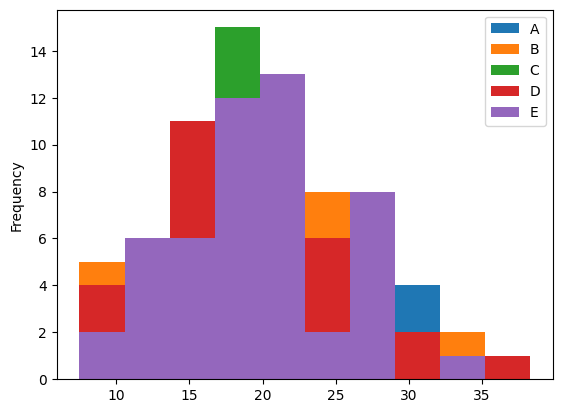

In [44]:
df2 = pd.DataFrame(np.random.chisquare(20, size=(50,5)), columns=['A', 'B', 'C', 'D', 'E'])
df2.plot.hist()

<Axes: xlabel='Frequency'>

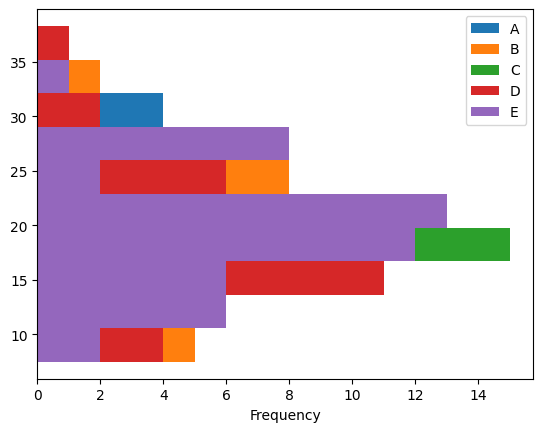

In [45]:
df2.plot.hist(orientation='horizontal')

#### График с заливкой

<Axes: >

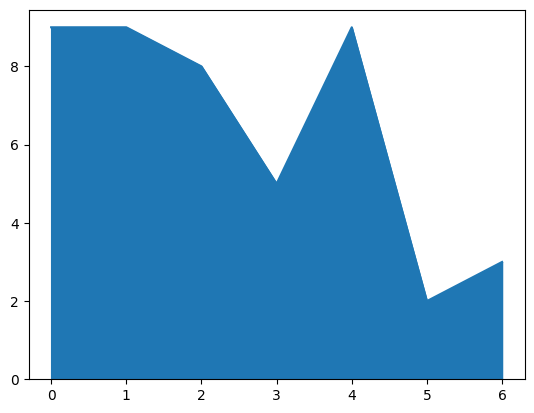

In [46]:
s = pd.Series([random.randrange(2, 10) for i in range(7)])
s.plot.area()

<Axes: >

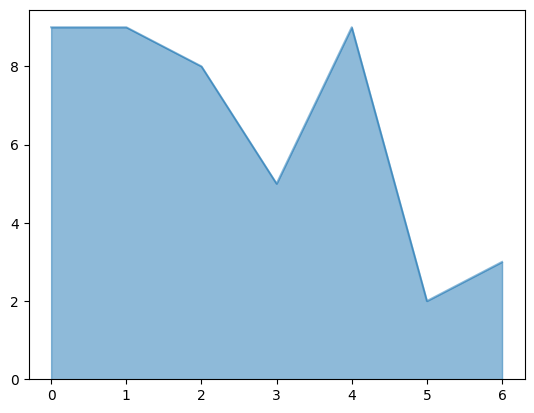

In [48]:
# Можно изменить прозрачность заливки через параметр alpha:

s.plot.area(alpha=0.5)

<Axes: >

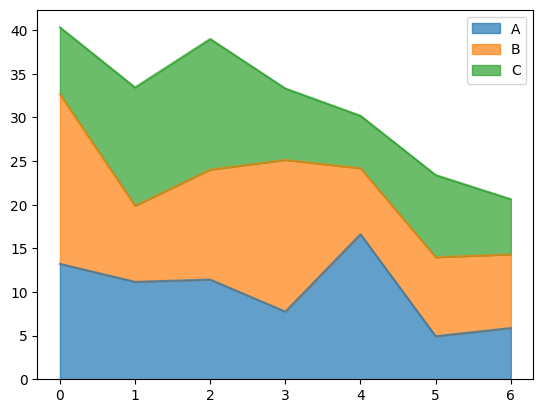

In [50]:
df3 = pd.DataFrame(np.random.chisquare(10, size=(7,3)), columns=['A', 'B', 'C'])
df3.plot.area(alpha=0.7)

<Axes: >

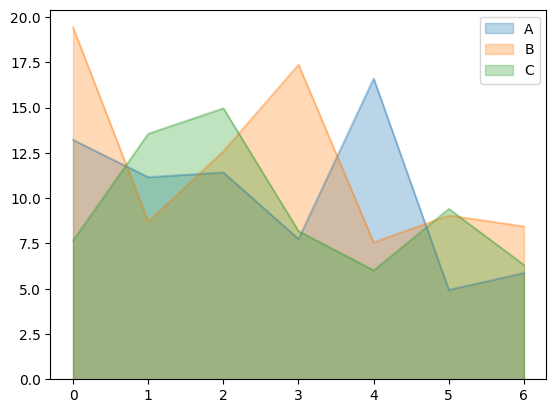

In [51]:
df3.plot.area(stacked=False, alpha=0.3)

#### Точечный график

<Axes: xlabel='X', ylabel='Y'>

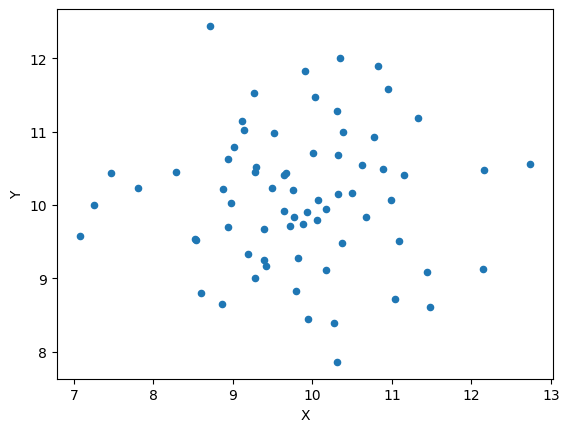

In [52]:
df4 = pd.DataFrame(np.random.normal(10, size=(70,2)), columns=['X', 'Y'])
df4.plot.scatter(x='X', y='Y')

<Axes: xlabel='X', ylabel='Y'>

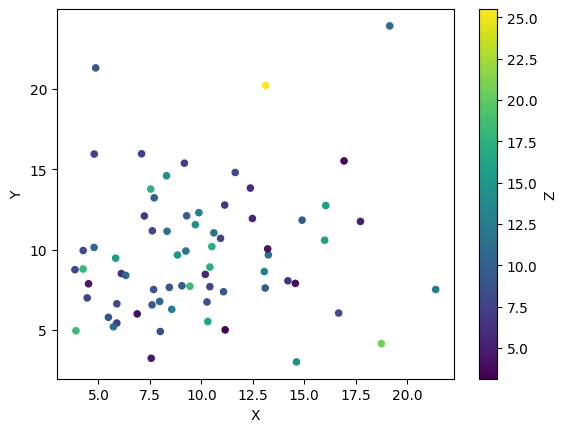

In [53]:
# еще один столбец, который будет определять цвет

df5 = pd.DataFrame(np.random.chisquare(10, size=(70,3)),
columns=['X', 'Y', 'Z'])

df5.plot.scatter(x='X', y='Y', c='Z')

#### Круговая диаграмма

<Axes: >

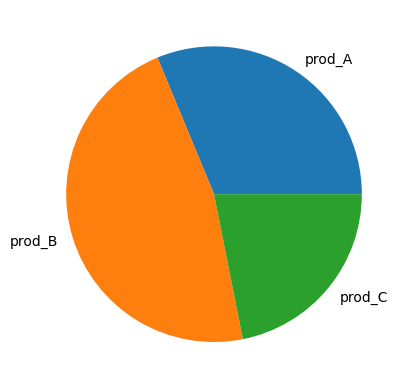

In [54]:
s = pd.Series([10, 15, 7], index=['prod_A', 'prod_B', 'prod_C'])
s.plot.pie()

<Axes: >

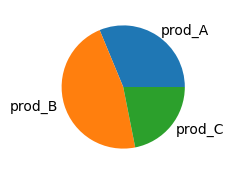

In [56]:
s.plot.pie(figsize=(2,2))

<Axes: >

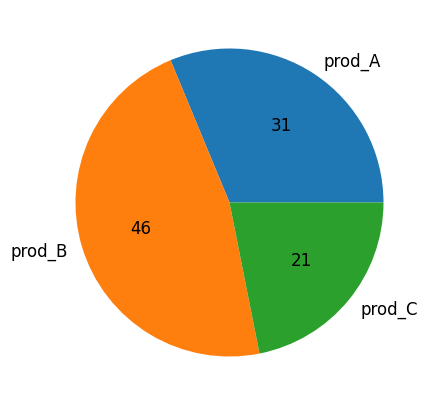

In [57]:
# выводить численные значения, соответствующие размеру сектора
s.plot.pie(figsize=(5,5), autopct='%d', fontsize=12)

<Axes: ylabel='Store'>

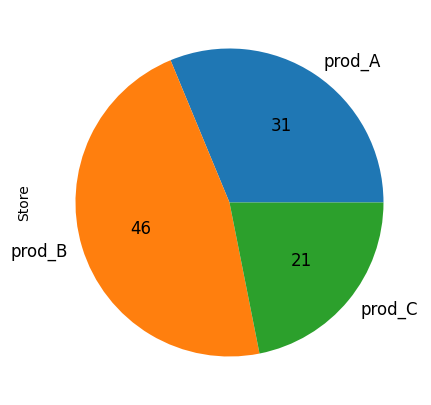

In [58]:
# Для вывода имени диаграммы его (имя) нужно предварительно присвоить соответствующей pandas структуре

s = pd.Series([10, 15, 7], index=['prod_A', 'prod_B', 'prod_C'],
name='Store')

s.name = 'Store'

s.plot.pie(figsize=(5,5), autopct='%d', fontsize=12)

#### Диаграмма из шестиугольников

<Axes: xlabel='X', ylabel='Y'>

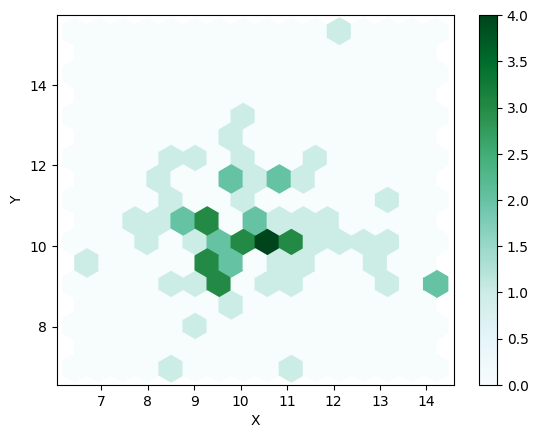

In [65]:
df6 = pd.DataFrame(np.random.laplace(10, size=(70,3)), columns=['X', 'Y', 'Z'])
df6.plot.hexbin(x='X', y='Y', gridsize=15)

### 11.2 Настройка внешнего вида диаграммы

Для того, чтобы изменить внешний вид графика необходимо аргументу
style метода plot() присвоить соответствующее значение

<Axes: >

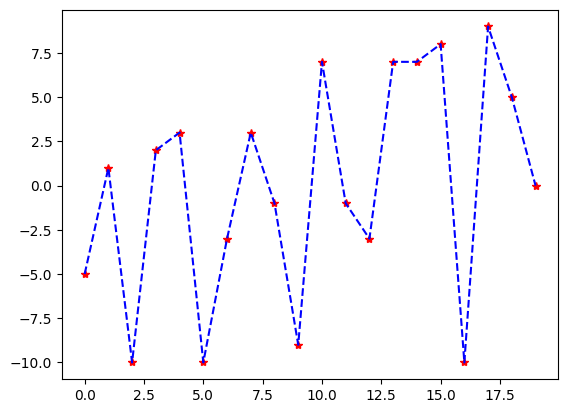

In [72]:
rnd = [random.randrange(-10, 10) for i in range(20)]
s = pd.Series(rnd)

s.plot(style='r*') # r - красная * -звезда
s.plot(style='b--')

Символы, определяющие цвет
- 'b' синий
- 'g' зеленый
- 'r' красный
- 'c' голубой
- 'm' пурпурный
- 'y' желтый
- 'k' черный
- 'w' белый

Символы, определяющие тип линии/точек
- '-' сплошная линия
- '--' штриховая линия
- '-.' линия “точка-тире”
- ':' пунктирная линия
- '.' маркер: точка
- ',' маркер: пиксель
- 'o' маркер: круг
- 'v' маркер: треугольник с направленной вниз вершиной
- '^' маркер: треугольник с направленной вверх вершиной
- '<' маркер: треугольник с направленной влево вершиной
- '>' маркер: треугольник с направленной вправо вершиной
- '1' маркер: трехлучевая звезда направленная лучом вниз
- '2' маркер: трехлучевая звезда, направленная лучом вверх
- '3' маркер: трехлучевая звезда, направленная лучом влево
- '4' маркер: трехлучевая звезда, направленная лучом вправо
- 's' маркер: квадрат
- 'p' маркер: пятиугольник
- '*' маркер: звезда
- 'h' маркер: шестиугольник (тип 1)
- 'H' маркер: шестиугольник (тип 2)
- '+' маркер: плюс
- 'x' маркер: х
- 'D' diamond marker
- 'd' thin_diamond marker
- '|' vline marker
- '_' hline marker

Вывод графиков на разных плоскостях

<Axes: >

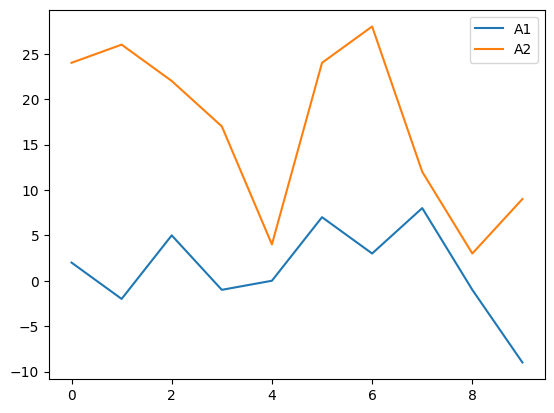

In [73]:
d_arr = [[random.randrange(-10, 10), random.randrange(0, 30)] for i
in range(10)]
df = pd.DataFrame(d_arr, columns=['A1', 'A2'])
# на одном поле
df.plot()

array([<Axes: >, <Axes: >], dtype=object)

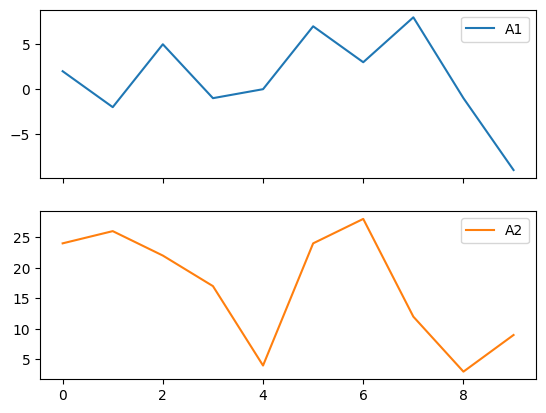

In [74]:
# по разным полям
df.plot(subplots=True)

array([<Axes: >, <Axes: >], dtype=object)

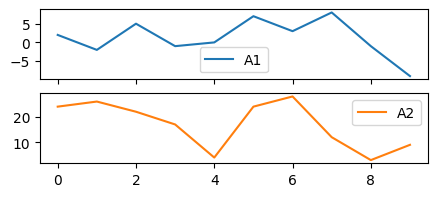

In [76]:
# тобы было удобно их просматривать - зададим нужный размер

df.plot(subplots=True, figsize=(5,2))

Можно изменить компоновку графиков, это делается через параметр
layout, которому в качестве значения присваивается кортеж, первый
аргумент которого количество строк, второй - количество столбцов,
создаваемой компоновки

array([[<Axes: >, <Axes: >]], dtype=object)

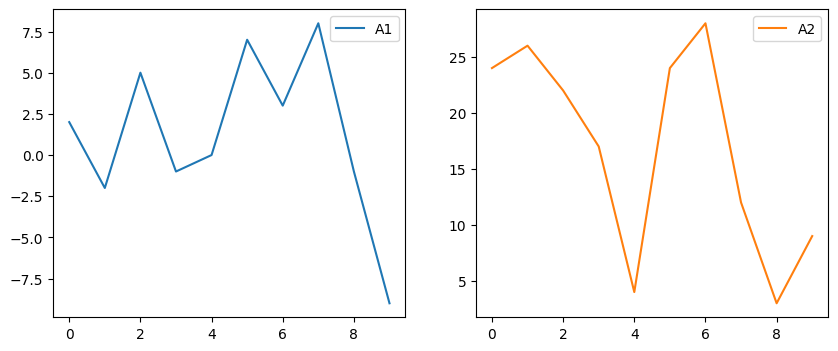

In [77]:
df.plot(subplots=True, layout=(1,2), figsize=(10,4))

## Глава 13. Другое

### 13.1 Дубликаты

In [12]:
# Поиск дубликатов
duplicates = df.duplicated()

# Подсчет количества дубликатов
num_duplicates = df.duplicated().sum()

# Фильтрация дубликатов
duplicate_rows = df[df.duplicated()]

# Удаление дубликатов
df_cleaned = df.drop_duplicates()

# Удаление всех строк, которые дублируются
df_no_duplicates = df.drop_duplicates(keep=False)

# Удаление дубликатов по определённым столбцам
df_cleaned = df.drop_duplicates(subset=['Name'])

# Удаление дубликатов с inplace=True
df.drop_duplicates(inplace=True)

NameError: name 'df' is not defined

По умолчанию, drop_duplicates() сохраняет первую встреченную строку, а остальные дубликаты удаляет.
Можно настроить этот метод с параметром keep:

    keep='first': сохраняет первую строку, все остальные дубликаты удаляются (по умолчанию).
    keep='last': сохраняет последнюю строку.
    keep=False: удаляет все дубликаты.